In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%aimport caplib
from caplib import show, clusterize, load_random_img
import caplib

In [267]:
import cv2
import math
from matplotlib import pyplot as plt
import numpy as np
from itertools import filterfalse
from functools import reduce
# from functools import partial
from operator import add
# is_not_none = partial(is_not, None)

In [229]:
def filter_light_weighted(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    return caplib.non_zero_pixels(c_erode) != 0


def filter_max_height(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))
    return np.max(caplib.get_hist(c_erode[:, :, 1])) > img.shape[0]/4


def filter_min_width(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    c_erode = cv2.morphologyEx(c_erode, cv2.MORPH_DILATE, 
                               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,6)))
    
    (x, y, w, h) = cv2.boundingRect(c_erode)
    return w >= img.shape[1]/20


def filter_max_width(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    c_erode = cv2.morphologyEx(c_erode, cv2.MORPH_DILATE, 
                               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,6)))
    
    (x, y, w, h) = cv2.boundingRect(c_erode)
    return w <= img.shape[1]*2/3


def filter_comp_count(img):
    c_erode = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)))
    c_erode = cv2.morphologyEx(c_erode, cv2.MORPH_DILATE, 
                               cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,6)))
    output = cv2.connectedComponentsWithStats(c_erode)
    return output[0] <= 10

11


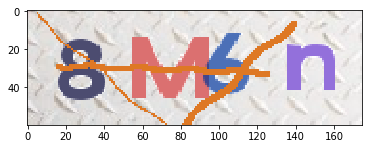

3M5I1


In [275]:
i += 1
(fname,img) = load_random_img(i)
print(fname)
clusters = map(caplib.simple_bin, clusterize(img))
clusters = filter(filter_comp_count, clusters)
clusters = filter(filter_light_weighted, clusters)
clusters = filter(filter_min_width, clusters)
clusters = filter(filter_max_width, clusters)
clusters = list(clusters)

# show(clusters)
res = []
for c in clusters:
    (x,c) = caplib.crop_erode(c)
    res.append((x, caplib.recognize(c)))
    # show(c)
res = reduce(lambda a,x: a+x[1], sorted(res, key=lambda x: x[0]),'')
show(img)
print(res)

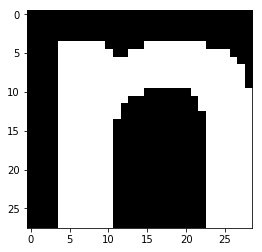

'I1'

In [276]:
x = clusters[0]
_,x = caplib.crop_erode(x)
show(x)
caplib.recognize(x)